# Introduction

In this notebook we will explore the data and try to find some insights. We will also try to find some patterns in the data which will help us in feature engineering and model building for later stages.

# Setup

In [4]:
%pip install numpy pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setup matplotlib
pd.plotting.register_matplotlib_converters()
%matplotlib inline

In [6]:
# Path to files
test_csv_path = "./data/test.csv"
train_csv_path = "./data/train.csv"
train_labels_csv = "./data/train_labels.csv"

sample_submission_csv = "./data/sample_submission.csv"

# Data Loading

In [7]:
level_group_cat_type = pd.CategoricalDtype(
    categories=["0-4", "5-12", "13-22"], ordered=True
)

In [8]:
train_df = pd.read_csv(
    train_csv_path,
    index_col="index",
    dtype={
        "session_id": "int64",
        "elapsed_time": "int32",
        "event_name": "category",
        "name": "category",
        "level": "int8",
        "page": "Int8",
        "room_coor_x": "float32",
        "room_coor_y": "float32",
        "screen_coor_x": "float32",
        "screen_coor_y": "float32",
        "hover_duration": "float32",
        "text": "str",
        "fqid": "category",
        "room_fqid": "category",
        "text_fqid": "category",
        "fullscreen": "bool",
        "hq": "bool",
        "music": "bool",
        "level_group": level_group_cat_type,
    },
)

In [9]:
target_df = pd.read_csv(train_labels_csv)

In [10]:
target_df[["session_id", "question_number"]] = target_df["session_id"].str.split(
    "_", expand=True
)

In [11]:
# Get the question number as int
target_df["question_number"] = (
    target_df["question_number"].str.extract("(\d+)").astype("int8")
)

Its not necessary, but we are going to convert the correct column to a boolean type.

In [12]:
target_df["correct"] = target_df["correct"].astype("bool")

# EDA

In [13]:
# Check number of nan values in each column
train_df.isna().sum()

session_id               0
elapsed_time             0
event_name               0
name                     0
level                    0
page              25732402
room_coor_x        2073272
room_coor_y        2073272
screen_coor_x      2073272
screen_coor_y      2073272
hover_duration    24294702
text              16679807
fqid               8274415
room_fqid                0
text_fqid         16679702
fullscreen               0
hq                       0
music                    0
level_group              0
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'page'),
  Text(1, 0, 'hover_duration'),
  Text(2, 0, 'text'),
  Text(3, 0, 'text_fqid'),
  Text(4, 0, 'fqid'),
  Text(5, 0, 'screen_coor_y'),
  Text(6, 0, 'room_coor_x'),
  Text(7, 0, 'room_coor_y'),
  Text(8, 0, 'screen_coor_x'),
  Text(9, 0, 'room_fqid'),
  Text(10, 0, 'music'),
  Text(11, 0, 'hq'),
  Text(12, 0, 'fullscreen'),
  Text(13, 0, 'session_id'),
  Text(14, 0, 'elapsed_time'),
  Text(15, 0, 'level'),
  Text(16, 0, 'name'),
  Text(17, 0, 'event_name'),
  Text(18, 0, 'level_group')])

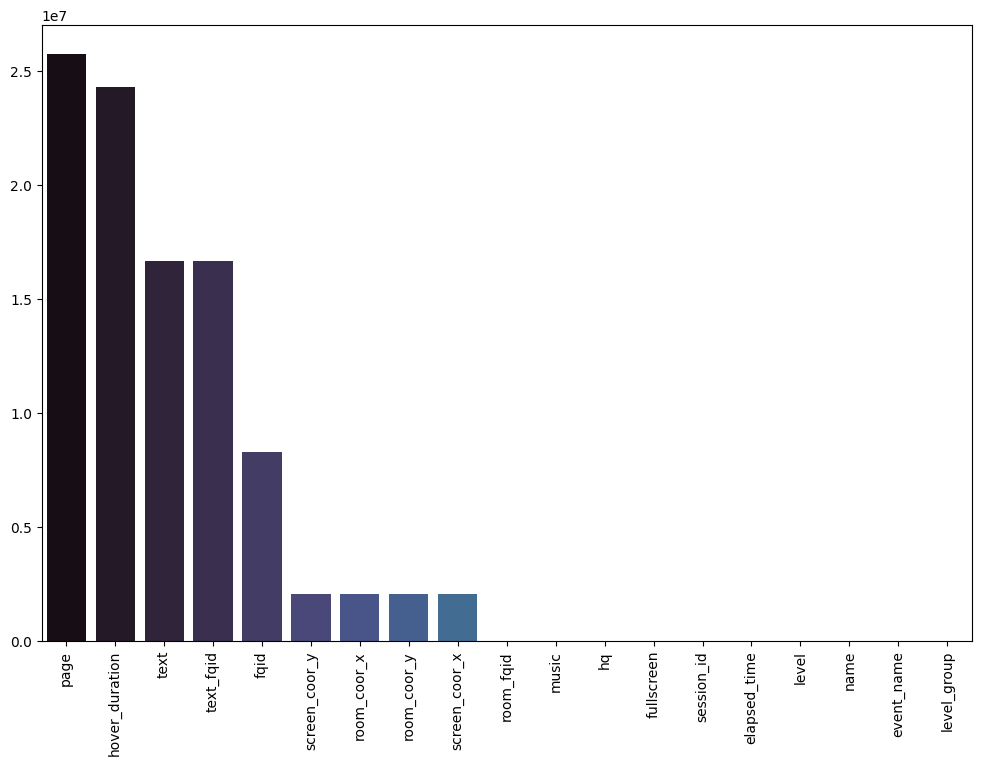

In [14]:
# Plot frequency of nan values in each column
plt.figure(figsize=(12, 8))

sns.barplot(
    x=train_df.isna().sum().index,
    y=train_df.isna().sum().values,
    order=train_df.isna().sum().sort_values(ascending=False).index,
    palette="mako",
)

plt.xticks(rotation=90)

As we can see, some columns like `page`, `hover_duration`, `text` and `text_fquid` have a lot of missing values. We'll see later how to deal with this and if this is a problem or not.

In [15]:
# Plot number of correct answers per question
plt.figure(figsize=(12, 8))

sns.countplot(x="question_number", hue="correct", data=targets_df, palette="mako")

plt.xlabel("Question number")
plt.ylabel("Answers")

plt.title("Number of correct answers per question number")

NameError: name 'targets_df' is not defined

<Figure size 1200x800 with 0 Axes>

(500.0, 2500.0)

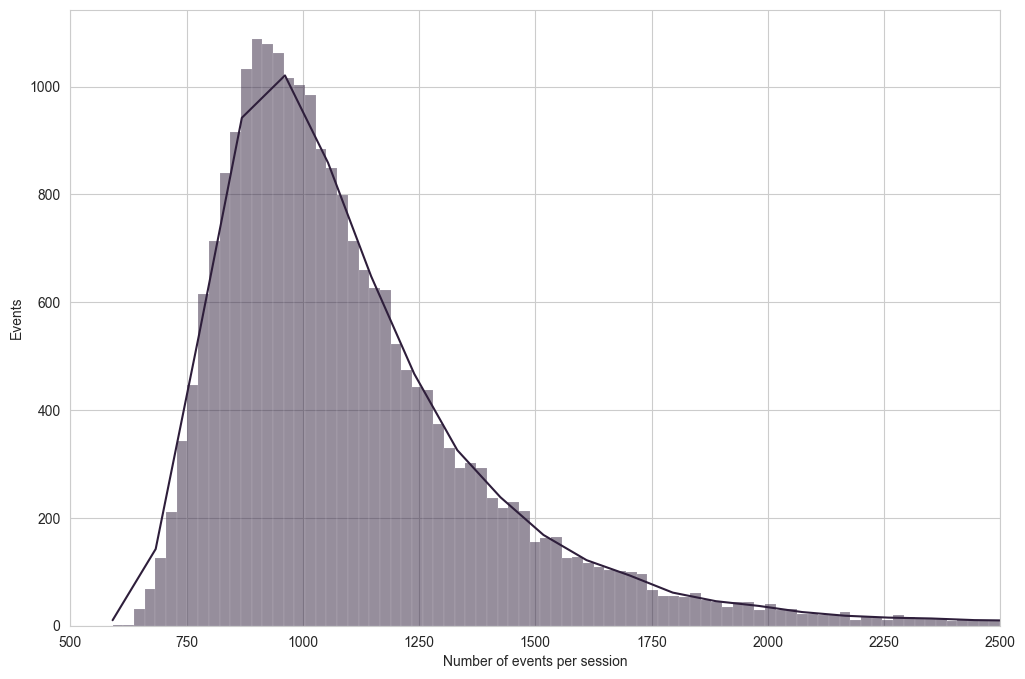

In [ ]:
# Plot number of events by session
plt.figure(figsize=(12, 8))

sns.histplot(
    x=train_df["session_id"].value_counts(),
    data=train_df,
    kde=True,
    color=sns.color_palette("mako")[0],
)

plt.xlabel("Number of events per session")
plt.ylabel("Events")
plt.xlim(500, 2500)

In [ ]:
# Average number of events per session
train_df["session_id"].value_counts().mean()

1116.0744418979714

In [ ]:
# Total time spent by each user using elapsed time column (in minutes)
elapsed_time_min = train_df.groupby("session_id")["elapsed_time"].sum() / 60_000
elapsed_time_min

session_id
20090312431273200      9282.349917
20090312433251036     57896.157883
20090312455206810      8390.254900
20090313091715820     13388.543383
20090313571836404      7741.139200
                         ...      
22100215342220508    132394.973233
22100215460321130     18117.862167
22100217104993650     21332.451567
22100219442786200      8820.977583
22100221145014656     82537.700100
Name: elapsed_time, Length: 23562, dtype: float64

In [ ]:
# Max time spent by an user
elapsed_time_min.max()

32705279.8279

In [ ]:
# Min time spent by an user
elapsed_time_min.min()

6.451966666666666

In [ ]:
# Average time spent by an user
elapsed_time_min.mean()

74715.48994760065

<Axes: xlabel='count', ylabel='event_name'>

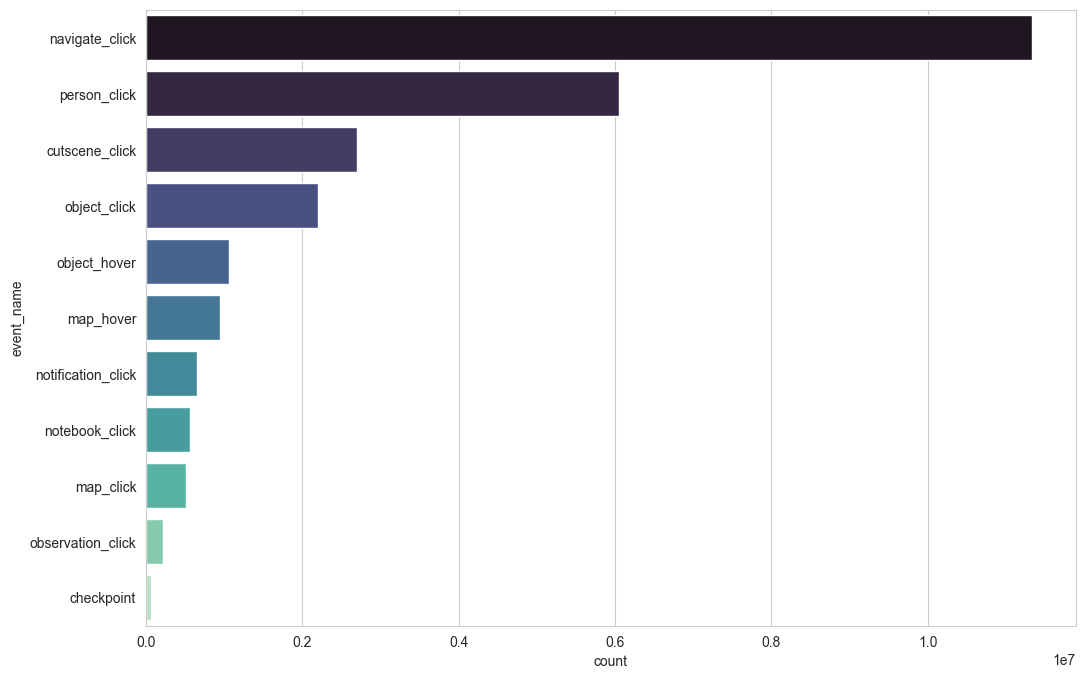

In [ ]:
# Plot frequency of events
plt.figure(figsize=(12, 8))

sns.countplot(
    y="event_name",
    data=train_df,
    order=train_df["event_name"].value_counts().index,
    palette="mako",
)

In [ ]:
# Number of events per level_group
counts = train_df["level_group"].value_counts().sort_index()
counts

level_group
0-4       3981005
5-12      8844238
13-22    13471703
Name: count, dtype: int64

([<matplotlib.axis.YTick at 0x7f7aac4d0110>,
 [Text(0, 3981005, '3981005'),
  Text(0, 8844238, '8844238'),
  Text(0, 13471703, '13471703')])

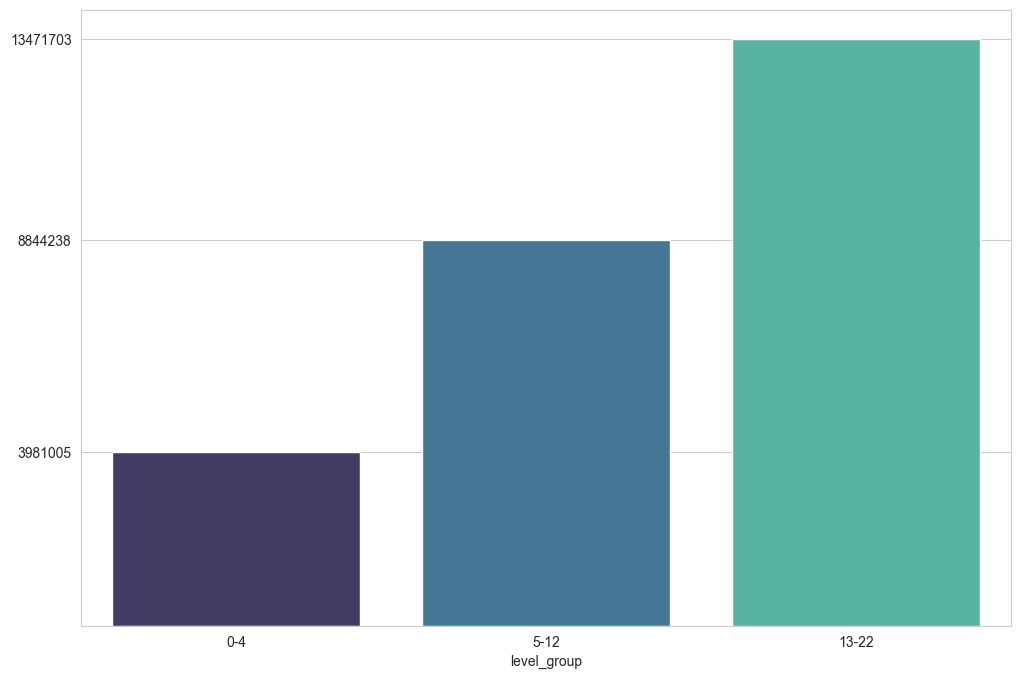

In [ ]:
# Plot number of events per level_group
plt.figure(figsize=(12, 8))

sns.barplot(x=counts.index, y=counts.values, palette="mako")

plt.yticks(counts.values, counts.values)

In [ ]:
# Number of events per level
counts = train_df["level"].value_counts().sort_index()
counts

level
0      688992
1      726590
2      992615
3     1144768
4      428040
5      668188
6     2117796
7     1278207
8      888584
9     1137748
10     449139
11    1937208
12     367368
13     823875
14     550829
15    1219497
16    1295082
17    1207881
18    3499163
19    1217088
20    1129246
21    2110010
22     419032
Name: count, dtype: int64

<Axes: xlabel='level'>

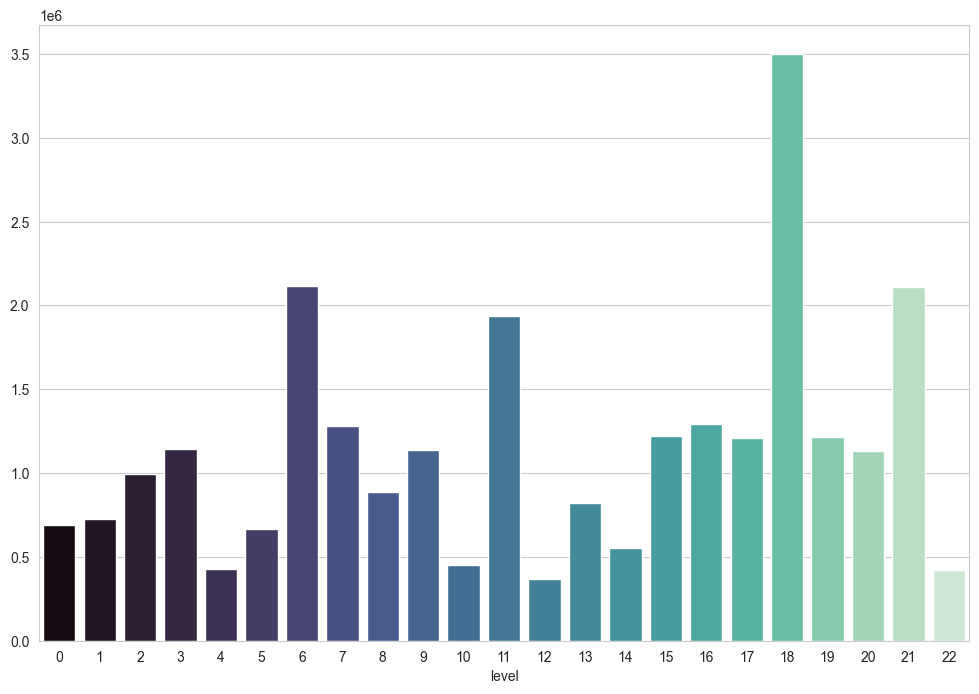

In [ ]:
# Plot number of events per level
plt.figure(figsize=(12, 8))

sns.barplot(
    x=counts.index,
    y=counts.values,
    palette="mako",
)